Diego Yael Islas Santoyo

09/09/2024

# Programación lineal

Usa los 5 pasos vistos en clase para plantear adecuadamente el siguiente ejercicio. Después, utiliza linprog para resolverlo.

**Ejercicio 1.**

Una carpintería local fabrica sillas, mesas, libreros y bases de cama. Hay dos empleados en esta carpintería: un empleado experimentado y un aprendiz. El aprendiz tarda aproximadamente 50% más tiempo que el carpintero experimentado en construir cualquier cosa, además de que tiene un desperdicio de alrededor de 20% de material. Los materiales y tiempos necesarios para construir algo se desglozan en la siguiente tabla:

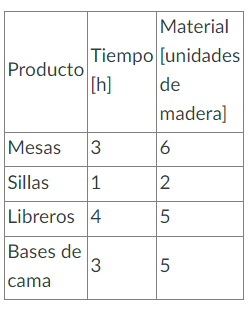

Las mesas se venden en $9000$, las sillas en $3000$, los libreros en $10000$, y las bases de cama en $9000$. Suponiendo una jornada de 40 horas a la semana y que tienen 100 unidades de madera, ¿qué les conviene construir durante una semana para maximizar su ganancia?

¿Cuántas horas trabaja cada quién?

¿Cuánto material se usa?

¿Cuál se el ingreso total si se vende todo lo fabricado?

2. La carpintería recibió una orden por 3 combos de mesa + 6 sillas.

¿Se puede cumplir la orden?

Si sí, ¿qué es lo que tienen que fabricar en el resto del tiempo y con el resto del material para maximizar su ganancia?

¿Cuántas horas trabaja cada quién?

¿Cuánto material se usa?

¿Cuál es el nuevo ingreso total?

**1.- Identificar criterio de optimización (Maximizar las ganancias)**

**2.-¿Sabes que puedo influir?**
+ $$x_{ME} : Num. de Mesas$$
+ $$x_{SE} : Num. de Sillas$$
+ $$x_{LE} : Num. de Libreros$$
+ $$x_{BE} : Num. de Bases de cama$$
+ $$x_{MA} : Num. de Mesas, APRENDIZ$$
+ $$x_{SA} : Num. de Sillas, APRENDIZ$$
+ $$x_{LA} : Num. de Libreros, APRENDIZ$$
+ $$x_{BA} : Num. de Bases de cama, APRENDIZ$$


**3.-f(xME,xSE,xLE,xBE,xMA,xSA,xLA,xBA)** $$Maximizar =9000x_{ME} + 3000x_{SE} + 10000x_{LE} + 9000x_{BE} + 9000x_{MA} + 3000x_{SA} + 10000x_{LA} + 9000x_{BA}$$


**4.- Información adicional (restricciones)**

**Trabajador experimentado**
+ $$Mesas: 3x_{ME} hrs$$
+ $$Sillas: x_{SE} hrs$$
+ $$Libreros: 4x_{LE} hrs$$
+ $$Bases de cama: 3x_{BE} hrs$$
**Tiempo total $$\leq 40$$**

+ $$Mesas: 6x_{ME} unidades$$
+ $$Sillas: 2x_{SE} unidades $$
+ $$Libreros : 5x_{LE} unidades$$
+ $$Bases de cama : 5x_{BE} unidades$$
**Unidades totales $$\leq 100$$**

**Aprendiz (50% mas)**
+ $$Mesas: 4.5x_{MA} hrs$$
+ $$Sillas: 1.5x_{SA} hrs$$
+ $$Libreros: 6x_{LA} hrs$$
+ $$Bases de cama: 4.5x_{BA} hrs$$
**Tiempo total $$\leq 40$$**
  
**Aprendiz (20% mas)**
+ $$Mesas: 7.2x_{MA} unidades$$
+ $$Sillas: 2.4x_{SA} unidades $$
+ $$Libreros : 6x_{LA} unidades$$
+ $$Bases de cama : 6x_{BA} unidades$$
**Unidades totales $$\leq 100$$**
  
  

$$ 3x_{ME} + x_{SE} + 4x_{LE} + 3x_{BE} \leq 40$$
$$ 4.5x_{MA} + 1.5x_{SA} + 6x_{LA} + 4x_{BA} \leq 40$$
$$ 6x_{ME} + 2x_{SE} + 5x_{LE} + 5x_{BE} + 7.2x_{MA} + 2.4x_{SA} + 6x_{LA} + 6x_{BA} \leq 100$$


In [170]:
import numpy as np
c = np.array([
    -9000,
    -3000,
    -10000,
    -9000,
    -9000,
    -3000,
    -10000,
    -9000,

])

aub = np.array([
    [3,1,4,3,0,0,0,0],
    [6,2,5,5,7.2,2.4,6,6],
    [0,0,0,0,4.5,1.5,6,4.5],
    
])

bub =np.array([
    40, 
    100, 
    40, 

])

import scipy.optimize as opt
sol = opt.linprog(c, aub, bub,integrality=1)
print("Problema #1")
print("el ingreso total es:", sol.fun*-1)
print("las horas trabajadas por el experto son: ", np.dot(sol.x,[3,1,4,3,0,0,0,0]))
print("las horas trabajadas por el aprendiz son: ", np.dot(sol.x,[0,0,0,0,4.5,1.5,6,4.5]))
print("las unidades usadas son: ", np.dot(sol.x,[6,2,5,5,7.2,2.4,6,6]))

Problema #1
el ingreso total es: 176000.0
las horas trabajadas por el experto son:  40.0
las horas trabajadas por el aprendiz son:  39.0
las unidades usadas son:  100.0


In [172]:
import numpy as np
c = np.array([
    -9000,
    -3000,
    -10000,
    -9000,
    -9000,
    -3000,
    -10000,
    -9000,
])

aub = np.array([
    [3,1,4,3,0,0,0,0],
    [6,2,5,5,7.2,2.4,6,6],
    [0,0,0,0,4.5,1.5,6,4.5],
    [-1,0,0,0,-1,0,0,0],
    [0,-1,0,0,0,-1,0,0],
    
])

bub =np.array([
    40, 
    100, 
    40,
    -3,
    -18,

])

import scipy.optimize as opt
sol = opt.linprog(c, aub, bub,integrality=1)
sol
print("Problema #2")
print("el ingreso total es:", sol.fun*-1)
print("las horas trabajadas por el experto son: ", np.dot(sol.x,[3,1,4,3,0,0,0,0]))
print("las horas trabajadas por el aprendiz son: ", np.dot(sol.x,[0,0,0,0,4.5,1.5,6,4.5]))
print("las unidades usadas son: ", np.dot(sol.x,[6,2,5,5,7.2,2.4,6,6]))

Problema #2
el ingreso total es: 161000.0
las horas trabajadas por el experto son:  39.0
las horas trabajadas por el aprendiz son:  30.0
las unidades usadas son:  99.0
